In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import shutil
from google.colab import files

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors
import matplotlib.colors as colors
from sklearn.decomposition import PCA
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, GlobalMaxPooling2D, Dense, Flatten, Dropout, MaxPooling2D, LSTM
from keras.callbacks import TensorBoard, EarlyStopping
from keras.utils import to_categorical

In [ ]:
pressure_path = "/content/drive/MyDrive/First2YearRawAndNormData/CESMU200/MinMaxNormWithLabel"
CL_path = pressure_path + "/CL"
COH_path = pressure_path + "/COH"
COL_path = pressure_path + "/COL"
NROI_path = pressure_path + "/NROI"


In [ ]:
CL_files = [f for f in os.listdir(CL_path) if f.endswith('.csv')]
COH_files = [f for f in os.listdir(COH_path) if f.endswith('.csv')]
COL_files = [f for f in os.listdir(COL_path) if f.endswith('.csv')]
NROI_files = [f for f in os.listdir(NROI_path) if f.endswith('.csv')]


In [ ]:
array = []
for file in CL_files:
    dataframe = pd.read_csv(os.path.join(CL_path, file), header=None)
    dataframe = dataframe.to_numpy().flatten()
    array.append(dataframe)

for file in COH_files:
    dataframe = pd.read_csv(os.path.join(COH_path, file), header=None)
    dataframe = dataframe.to_numpy().flatten()
    array.append(dataframe)

for file in COL_files:
    dataframe = pd.read_csv(os.path.join(COL_path, file), header=None)
    dataframe = dataframe.to_numpy().flatten()
    array.append(dataframe)

for file in NROI_files:
    dataframe = pd.read_csv(os.path.join(NROI_path, file), header=None)
    dataframe = dataframe.to_numpy().flatten()
    array.append(dataframe)

# K-means++

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA


In [ ]:
# Load data and create labels
df = array
df = pd.DataFrame(df)
Y = []
for i in range(len(CL_files)):
  Y.append(0)
for i in range(len(COH_files)):
  Y.append(1)
for i in range(len(COL_files)):
  Y.append(2)
for i in range(len(NROI_files)):
  Y.append(3)
Y = pd.DataFrame(Y)


In [ ]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(df)


In [ ]:
# KMeans++ clustering
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_  #n_clusters, n_init, max_iter, and tol 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cm = confusion_matrix(Y, labels)
acc = accuracy_score(Y, labels)
print(f'Confusion Matrix:\n{cm}\nAccuracy Score: {acc:.2f}')


Confusion Matrix:
[[  0 103  37  38]
 [151   6   3   1]
 [  2 108  93 124]
 [  4  37  15  15]]
Accuracy Score: 0.15


# K-means Using DBSCAN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Load data and labels
df = array
df = pd.DataFrame(df)
Y = []
for i in range(len(CL_files)):
  Y.append(0)
for i in range(len(COH_files)):
  Y.append(1)
for i in range(len(COL_files)):
  Y.append(2)
for i in range(len(NROI_files)):
  Y.append(3)
Y = pd.DataFrame(Y)

In [ ]:
# Scale data
scaler = RobustScaler()
X = scaler.fit_transform(df)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=200.5, min_samples=350)
dbscan_labels = dbscan.fit_predict(X)

In [ ]:
# Evaluate clustering performance
cm = confusion_matrix(Y, dbscan_labels)
acc = accuracy_score(Y, dbscan_labels)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc*100))

Confusion Matrix:
[[178   0   0   0]
 [161   0   0   0]
 [327   0   0   0]
 [ 71   0   0   0]]
Accuracy: 24.15%



K-means is an unsupervised learning algorithm that groups data points into a predefined number of clusters based on the similarity of their features. On the other hand, RNN (Recurrent Neural Network) and CNN (Convolutional Neural Network) are supervised learning algorithms that are used for classification tasks.

The main difference between these algorithms is that K-means does not take into account the actual labels of the data points and just tries to group them based on their features. This can sometimes result in low accuracy rates since the algorithm does not have any information about the true labels of the data.

RNN and CNN, on the other hand, are designed specifically for classification tasks and are trained using labeled data. They are able to learn the underlying patterns and relationships between the input features and their corresponding labels, which makes them more accurate for classification tasks.

Therefore, it is expected to have higher accuracy rates for RNN and CNN compared to K-means when dealing with classification tasks.

# **K-means**

In [ ]:
df = array
df = pd.DataFrame(df)
df.info()
Y = []
for i in range(len(CL_files)):
  Y.append(0)

for i in range(len(COH_files)):
  Y.append(1)

for i in range(len(COL_files)):
  Y.append(2)

for i in range(len(NROI_files)):
  Y.append(3)

Y = pd.DataFrame(Y)

scaler = StandardScaler()
X = scaler.fit_transform(df)

#print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Columns: 225 entries, 0 to 224
dtypes: float64(225)
memory usage: 1.3 MB


In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 42, init = "k-means++", n_init = 30)
kmeans.fit(X)
labels = kmeans.labels_

cm = confusion_matrix(Y, labels)
accuracy_score(Y, labels)

0.4355495251017639

In [ ]:
cm

array([[ 92,   0,   3,  83],
       [ 14,  97,  46,   4],
       [103,  85, 132,   7],
       [  0,  67,   4,   0]])

[[ 3.31152628e+00 -6.32628347e-02 -1.30918775e-01 ... -2.91592029e-04
   2.56987418e-05 -2.55175559e-05]
 [ 3.18518780e+00 -1.32506131e-01  1.01555845e-01 ... -3.76956803e-05
  -1.09894983e-04  2.27000079e-04]
 [ 6.32050519e+00 -4.11409743e-02  1.43478170e-01 ...  1.29221492e-04
   6.96474212e-05  2.49145026e-05]
 ...
 [-4.42710492e+00 -2.41340680e-02 -4.83963539e-02 ...  4.50719373e-05
   7.63084718e-05  9.42093783e-05]
 [-4.03050264e+00  3.42771577e-01 -2.66525146e-03 ... -4.55156206e-05
   7.39446682e-05  1.15952728e-04]
 [-4.55418849e+00 -8.64043653e-02  3.14312563e-02 ... -2.82434041e-04
  -5.16277540e-05  2.53334545e-04]]


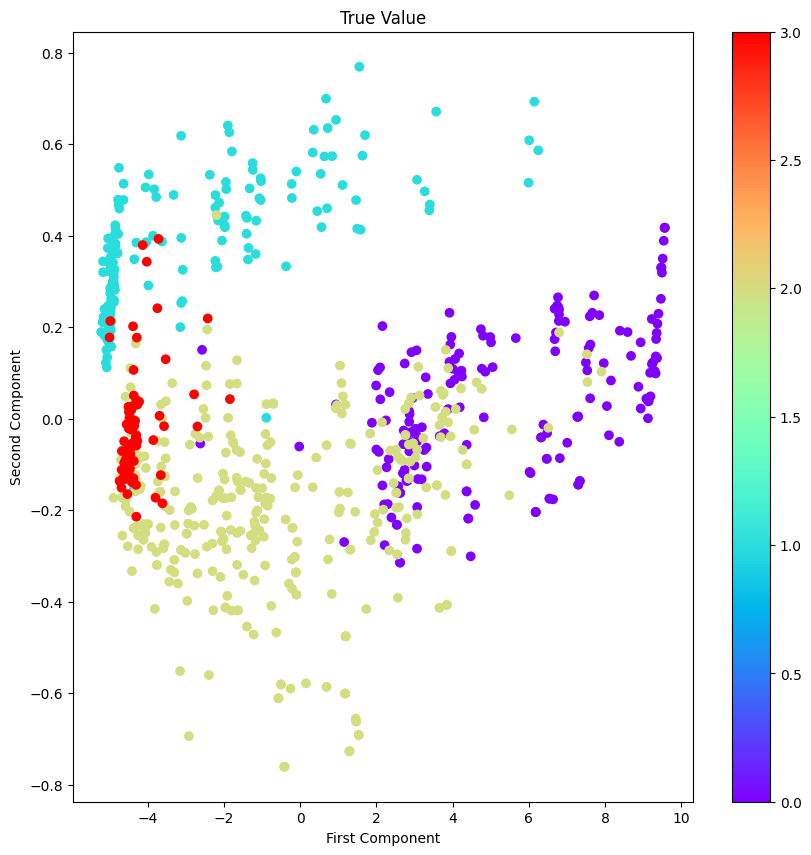

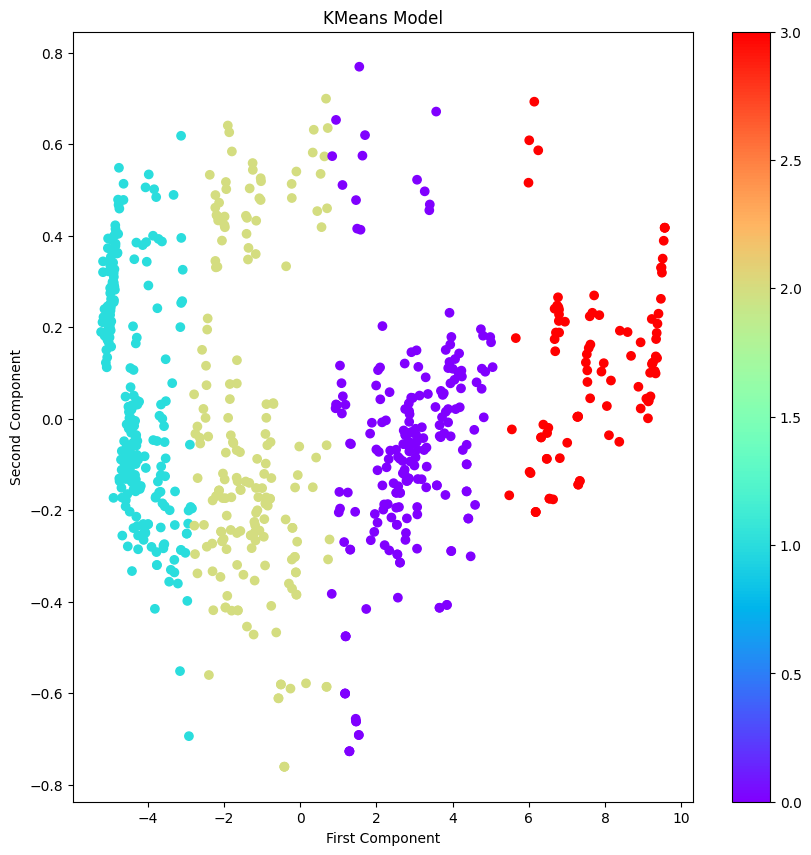

In [ ]:
pca = PCA(n_components=225)
principalComponents = pca.fit_transform(df)
print(principalComponents)


fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(principalComponents[:, 0], principalComponents[:, 1], c = Y, cmap='rainbow')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('True Value')
plt.colorbar(scatter)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(principalComponents[:, 0], principalComponents[:, 1], c = labels, cmap='rainbow')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('KMeans Model')
plt.colorbar(scatter)
plt.show()


K-means is a clustering algorithm and is typically used for unsupervised learning tasks. It can be used for data exploration and to identify underlying patterns or groups within the data. For example, it can be used to segment customer data into different groups based on their purchasing behavior or to group news articles into different topics based on their content.

RNN (Recurrent Neural Network) and CNN (Convolutional Neural Network) are both types of neural networks that are used for supervised learning tasks, such as classification, regression, and time-series analysis. They are often used for tasks such as image recognition, natural language processing, and speech recognition, where the data has a clear structure and can be represented in a grid or sequence format.

RNNs are particularly useful for sequential data, where there is a temporal or time-based relationship between the data points. For example, RNNs can be used for predicting stock prices, where the previous day's prices are used to predict the current day's price.

CNNs are often used for image recognition tasks, where the data is represented as a grid of pixels. They can also be used for tasks such as speech recognition and natural language processing, where the data can be represented as a sequence of feature vectors.

In summary, K-means is used for unsupervised learning tasks such as clustering, while RNN and CNN are used for supervised learning tasks such as classification, regression, and time-series analysis.

# **SOM**

In [ ]:
#Normalization
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

#Euclidean distance
def e_distance(x, y):
    return distance.euclidean(x, y)

#Manhanttan distance
def m_distance(x, y):
    return distance.cityblock(x, y)

#Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

#Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range


In [ ]:
num_rows = 15
num_cols = 15
max_m_dsitance = 10
max_learning_rate = 0.75
max_steps = 100000

In [ ]:
#main function

train_x_norm = minmax_scaler(X) # normalisation
# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
#np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
Iteration:  51000
Iteration:  52000
Iteration:  53000
Iteration:  54000
Iteration:  55000
Iteration:  56000
I

In [ ]:
label_data = np.array(Y)
map = np.empty(shape=(num_rows, num_cols), dtype=object)


for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  #print(winner)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

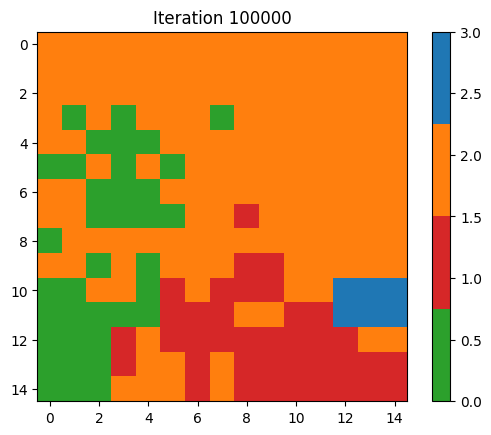

In [ ]:
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange', 'tab:blue'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [ ]:

# test data

# using the trained som, search the winning node of corresponding to the test data
# get the label of the winning node

data = minmax_scaler(X) # normalisation

winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(Y, np.array(winner_labels)))

Accuracy:  0.8955223880597015


In [ ]:
cm = confusion_matrix(Y, np.array(winner_labels))
cm

array([[169,   0,   9,   0],
       [  0, 159,   1,   1],
       [ 21,   3, 288,  15],
       [  0,   7,  20,  44]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size = 0.2, random_state = 42, shuffle = True)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(589, 225) (589, 1) (148, 225) (148, 1)


In [ ]:
#Reshape and normalize training and testing data
train_X = X_train.to_numpy().reshape(X_train.shape[0],15,15,1).astype("float32")

train_Y = Y_train.to_numpy()

test_X = X_test.to_numpy().reshape(X_test.shape[0],15,15,1).astype("float32")

test_Y = Y_test.to_numpy()

train_Y = to_categorical(train_Y, num_classes=4)
test_Y = to_categorical(test_Y, num_classes=4)


# **CNN**

In [ ]:
#Define the model architecture
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu", input_shape = (15, 15, 1)))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(4, activation = "softmax"))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=30)
tensorboard_callback = TensorBoard(log_dir="./logs")

# Fit the model
model.fit(train_X, train_Y, epochs=1000, batch_size=32, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/1000
19/19 [==============================] - 2s 25ms/step - loss: 1.2996 - accuracy: 0.3837
Epoch 2/1000
19/19 [==============================] - 0s 25ms/step - loss: 1.2212 - accuracy: 0.5229
Epoch 3/1000
19/19 [==============================] - 0s 23ms/step - loss: 1.0238 - accuracy: 0.5857
Epoch 4/1000
19/19 [==============================] - 0s 23ms/step - loss: 0.9482 - accuracy: 0.5620
Epoch 5/1000
19/19 [==============================] - 0s 22ms/step - loss: 0.8785 - accuracy: 0.6163
Epoch 6/1000
19/19 [==============================] - 0s 26ms/step - loss: 0.8815 - accuracy: 0.5925
Epoch 7/1000
19/19 [==============================] - 0s 24ms/step - loss: 0.8679 - accuracy: 0.5908
Epoch 8/1000
19/19 [==============================] - 0s 25ms/step - loss: 0.8758 - accuracy: 0.5891
Epoch 9/1000
19/19 [==============================] - 0s 23ms/step - loss: 0.8341 - accuracy: 0.5993
Epoch 10/1000
19/19 [==============================] - 0s 23ms/step - loss: 0.8460 - accura

In [ ]:
y_pred = model.predict(test_X).argmax(axis=1)
y_true_value = np.argmax(test_Y, axis = 1) #to change to one dimension 

accuracy = accuracy_score(y_true_value, y_pred)
print('Test accuracy:', accuracy)

5/5 [==============================] - 0s 15ms/step
Test accuracy: 0.8918918918918919


In [ ]:
conf_matrix = confusion_matrix(y_true_value, y_pred)
print(conf_matrix)

[[34  0  4  0]
 [ 0 32  0  0]
 [ 2  0 59  4]
 [ 0  1  5  7]]


# **RNN**


In [ ]:
#Define the model architecture
model_rnn = Sequential()
model_rnn.add(LSTM(16, input_shape=(15,15), return_sequences=True))
model_rnn.add(Dropout(0.1))
model_rnn.add(LSTM(16, return_sequences=True))
model_rnn.add(Dropout(0.1))
model_rnn.add(LSTM(16))
model_rnn.add(Dense(4, activation='softmax'))

In [ ]:
model_rnn.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=30)


#Fit the model
model_rnn.fit(train_X, train_Y, epochs = 1000, batch_size = 16, verbose = 2, callbacks = early_stopping)

Epoch 1/1000
37/37 - 7s - loss: 1.2825 - accuracy: 0.4414 - 7s/epoch - 196ms/step
Epoch 2/1000
37/37 - 1s - loss: 1.1534 - accuracy: 0.5331 - 615ms/epoch - 17ms/step
Epoch 3/1000
37/37 - 1s - loss: 1.0253 - accuracy: 0.5586 - 619ms/epoch - 17ms/step
Epoch 4/1000
37/37 - 1s - loss: 0.9582 - accuracy: 0.5603 - 640ms/epoch - 17ms/step
Epoch 5/1000
37/37 - 1s - loss: 0.9430 - accuracy: 0.5586 - 636ms/epoch - 17ms/step
Epoch 6/1000
37/37 - 1s - loss: 0.9169 - accuracy: 0.5501 - 605ms/epoch - 16ms/step
Epoch 7/1000
37/37 - 1s - loss: 0.8995 - accuracy: 0.5857 - 623ms/epoch - 17ms/step
Epoch 8/1000
37/37 - 1s - loss: 0.8683 - accuracy: 0.5976 - 613ms/epoch - 17ms/step
Epoch 9/1000
37/37 - 1s - loss: 0.8729 - accuracy: 0.6095 - 629ms/epoch - 17ms/step
Epoch 10/1000
37/37 - 1s - loss: 0.8675 - accuracy: 0.6010 - 624ms/epoch - 17ms/step
Epoch 11/1000
37/37 - 1s - loss: 0.8843 - accuracy: 0.5348 - 873ms/epoch - 24ms/step
Epoch 12/1000
37/37 - 1s - loss: 0.8680 - accuracy: 0.6027 - 943ms/epoch - 2

In [ ]:
# predict class probabilities for test set
Y_pred1 = model_rnn.predict(test_X)

# convert predicted probabilities to class labels
Y_pred_labels1 = np.argmax(Y_pred1, axis=1)


# convert true labels to class labels
Y_true_labels = np.argmax(test_Y, axis=1)

#Accuracy
accuracy = accuracy_score(Y_true_labels, Y_pred_labels1)
print(accuracy)

# compute confusion matrix
conf_matrix1 = confusion_matrix(Y_true_labels, Y_pred_labels1)

print(conf_matrix1)

5/5 [==============================] - 1s 6ms/step
0.8918918918918919
[[36  0  2  0]
 [ 0 32  0  0]
 [ 3  0 56  6]
 [ 0  1  4  8]]
